In [97]:
# Path: /home/jovyan/work/gustavo/teste_codenation/teste_codenation.ipynb
# docker cp pupxfinancejupyter:/home/jovyan/work/gustavo/teste_codenation/teste_codenation.ipynb ./teste_codenation.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [98]:
df_train = pd.read_csv("train.csv", index_col="NU_INSCRICAO")
df_test = pd.read_csv("test.csv", index_col="NU_INSCRICAO")

In [99]:
df_train = df_train.iloc[:,1:]
#df_train.head()
#df_test.head()

Variavel alvo: NU_NOTA_MT

Variaveis que eu acredito mais influenciar: 
* TP_DEPENDENCIA_ADM_ESC -> Dependência administrativa (Escola)
* TP_LOCALIZACAO_ESC -> Localização (Escola)
* NU_NOTA_CN -> Nota da prova de Ciências da Natureza
* NU_NOTA_CH -> Nota da prova de Ciências Humanas
* NU_NOTA_LC -> Nota da prova de Linguagens e Códigos
* TP_LINGUA -> Língua Estrangeira 
* NU_NOTA_REDACAO -> Nota da prova de redação
* TX_RESPOSTAS_MT -> Vetor com as respostas da parte objetiva da prova de Matemática

# Tratamento dos dados

In [100]:
# Tratamento dos dados:
df_train.NU_NOTA_CN = df_train.NU_NOTA_CN.replace(np.NaN, 0, regex=True)
df_train.NU_NOTA_CH = df_train.NU_NOTA_CH.replace(np.NaN, 0, regex=True)
df_train.NU_NOTA_LC = df_train.NU_NOTA_LC.replace(np.NaN, 0, regex=True)
df_train.NU_NOTA_REDACAO = df_train.NU_NOTA_REDACAO.replace(np.NaN, 0, regex=True)
df_test.NU_NOTA_CN = df_test.NU_NOTA_CN.replace(np.NaN, 0, regex=True)
df_test.NU_NOTA_CH = df_test.NU_NOTA_CH.replace(np.NaN, 0, regex=True)
df_test.NU_NOTA_LC = df_test.NU_NOTA_LC.replace(np.NaN, 0, regex=True)
df_test.NU_NOTA_REDACAO = df_test.NU_NOTA_REDACAO.replace(np.NaN, 0, regex=True)

In [101]:
# Substituindo NaN por 0 nas notas de matemática:

df_train.NU_NOTA_MT = df_train.NU_NOTA_MT.replace(np.NaN, 0)

# Retirando pessoas que faltaram a prova de matematica do modelo (TP_PRESENCA_MT):

df_train = df_train.loc[df_train.TP_PRESENCA_MT == 1]

NU_ANO                     10133
CO_MUNICIPIO_RESIDENCIA    10133
NO_MUNICIPIO_RESIDENCIA    10133
CO_UF_RESIDENCIA           10133
SG_UF_RESIDENCIA           10133
                           ...  
Q046                       10133
Q047                       10133
Q048                       10133
Q049                       10133
Q050                       10133
Length: 165, dtype: int64

In [105]:
# Retirando outlies da análise de regressão:

# sns.boxplot(df_train.NU_NOTA_REDACAO)
df_train = df_train.loc[(df_train.NU_NOTA_CN >= 300) & (df_train.NU_NOTA_CN <= 700)]
df_train = df_train.loc[(df_train.NU_NOTA_CH >= 300) & (df_train.NU_NOTA_CH <= 700)]
df_train = df_train.loc[(df_train.NU_NOTA_LC >= 300) & (df_train.NU_NOTA_LC <= 700)]
df_train = df_train.loc[(df_train.NU_NOTA_REDACAO >= 200) & (df_train.NU_NOTA_REDACAO <= 800)]

# Análise descritiva

In [106]:
# Gráficos de regressão das variaveis preditoras

# sns.scatterplot(df_train.NU_NOTA_CN, df_train.NU_NOTA_MT)
# sns.scatterplot(df_train.NU_NOTA_CH, df_train.NU_NOTA_MT)
# sns.scatterplot(df_train.NU_NOTA_LC, df_train.NU_NOTA_MT)
# sns.scatterplot(df_train.NU_NOTA_REDACAO, df_train.NU_NOTA_MT)

# Fase de treino do modelo

In [8]:
# Trabalhando com os acertos nas questões de matematica, para predizer utilizando um dummy em cada questão:
# df_train['TX_RESPOSTAS_MT'] = df_train.TX_RESPOSTAS_MT.map(lambda x: list(x))
# df_train.TX_GABARITO_MT = df_train.TX_GABARITO_MT.map(lambda x: list(x))

In [9]:
# Criando um DataFrame "notas" com um split das alternativas selecionas pelos alunos e o gabarito
# dict_notas = {'respostas': df_train.TX_RESPOSTAS_MT.tolist(), 'gabarito': df_train.TX_GABARITO_MT.tolist()}
# df_notas = pd.DataFrame(dict_notas, index=df_train.index)
# df_notas[['Q_Resposta'+str(i) for i in range(len(df_train.TX_RESPOSTAS_MT[0]))]] = pd.DataFrame(df_notas.respostas.values.tolist(), index=df_notas.index)
# df_notas[['Q_Gabarito'+str(i) for i in range(len(df_train.TX_GABARITO_MT[0]))]] = pd.DataFrame(df_notas.gabarito.values.tolist(), index=df_notas.index)

In [10]:
# Criando um dummy para saber quais as questões que o aluno acerto:
# df_desempenho = pd.DataFrame()
# for i in range(45):
#     df_desempenho["Q"+str(i)] = df_notas["Q_Resposta"+str(i)].eq(df_notas["Q_Gabarito"+str(i)]).astype(int)

In [23]:
# Regressão considerando as notas das demais provas:

# passando os valores de x e y como Dataframes
# X = df_desempenho
# Y = df_train.NU_NOTA_MT

# criando e treinando o modelo
# model = LinearRegression()
# model.fit(X,Y)

# para visualizar os coeficientes encontrados
# print(model.coef_)

# para visualizar o R²
# print(model.score(X,Y))

# mostrando as previsões para o mesmo conjunto passado
# predict = pd.Series(model.predict(X),index=df_train.index, name="Predict")

In [12]:
# df_result = pd.concat([Y, predict], axis=1)
# df_result["Erro_predicao1"] = df_result.NU_NOTA_MT - df_result.Predict

In [111]:
# Regressão do erro gerado considerando as notas das demais provas:

# passando os valores de x e y como Dataframes
X = df_train.loc[:,["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]]
Y = df_train.NU_NOTA_MT

# criando e treinando o modelo
model = LinearRegression()
model.fit(X,Y)

# para visualizar os coeficientes encontrados
# print(model.coef_)

# para visualizar o R²
# print(model.score(X,Y))

# mostrando as previsões para o mesmo conjunto passado
predict_train = pd.Series(model.predict(X),index=df_train.index, name="Predict")

In [114]:
df_result = pd.DataFrame()
df_result["Predict"] = predict_train

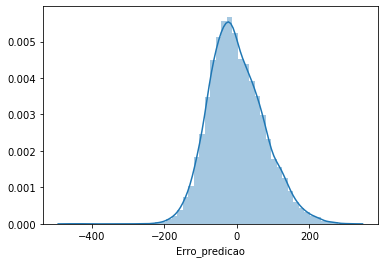

In [115]:
df_result["Erro_predicao"] = Y - df_result.Predict
sns.distplot(df_result.Erro_predicao)

# Fase de teste do modelo

In [116]:
df_resposta = pd.DataFrame()
X_test = df_test.loc[:,["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]]

In [118]:
predict_test = pd.Series(model.predict(X_test),index=df_test.index, name="NU_NOTA_MT")
df_resposta["NU_NOTA_MT"] = predict_test
df_resposta.to_csv("answer.csv")